# Kretsanalys

## a)
Beräkna spänningarna U1, U2, U3, U4 och U5 i nedanstående växelspännings krets. 

![](krets.png)

### Metod

För att kunna beräkna spänningarna behöver vi använda oss av någon form av kretsanalys. Här använder vi slinganalys för att hitta strömarna och spänningarna.

För att göra slinganalys behöver vi ha en referens nod och eftersom vi har en jordad nod så är det redan löst. Vi använder sedan Kirchoffs sling lag som säger 

$$
\sum_{k=0} ^n V_k = 0 
$$

För varje sluten slinga.

Med hjälp av detta sätter vi upp ett ekvations system

$$
V_1 - R_1 I_1 - C_1 I_1 + C_1 I_2 = 0 \\
V_3 - C_1 I_2 - R_4 I_2 - R_2 I_ 2 - L_1 I_2 + C_1 I_1 + R_2 I_3 = 0 \\
V_3 - R_3 I_3 - C_3 I_3 - C_2 I_3 -R_2 I_3 + R_2 I_2 + C_3 I_4 = 0 \\
V_2 - C_3 I_4 - L_2 I_4 + C_3 I_3 = 0
$$

Samlar vi termer ser det ut såhär

$$
I_1(R_1 + C_1) I_2(C_1) = V_1 \\
I_1(C_1) + I_2(C_1 + R_4 + R_2 + L_1) + I_3(R_2) = V_3 \\
I_2(R_2) + I_3(R_3 + C_3 + C_2 + R_2) + I_4(C_3) = V_3 \\
I_3(C_3) + I_4(C_3 + L_2) = V_2
$$

Detta kan skrivas på matrisform

$$
\begin{pmatrix}
    (R_1 + C_1) & C_1 & 0 & 0 \\
    C_1 & (C_1 + R_4 + R_2 + L_1) & R_2 & 0 \\
    0 & R_2 & (R_3 + C_3 + C_2 + R_2) & C_3 \\
    0 & 0 & C_3 & (C_3 + L_2)
\end{pmatrix}

\begin{pmatrix}
    I_1 \\
    I_2 \\
    I_3 \\
    I_4
\end{pmatrix}

=\begin{pmatrix}
    V_1 \\
    V_3 \\
    V_3 \\
    V_2
\end{pmatrix}
$$

Detta systemet löses sedan numeriskt med datorn och potentialerna i de givna punkterna ges av följande.

$$
U_1 = U_2 - I_2R_4 \\
U_2 = U_5 + I_3R_3 \\
U_3 = -I_3C_2 \\
U_4 = U_1 - I_1C_1-I_2C_1 \\
U_5 = I_4C_3+I_3C_3
$$

In [197]:
import cmath as cm
import numpy as np
from scipy.optimize import minimize

In [198]:
#I detta blocket definerar vi spänningar och komponenter i kretsen
f = 1000
w = 2*np.pi*f

E1 = 5*cm.exp(1j*0)
E2 = 3*cm.exp(1j*cm.pi/2)
E3 = 1*cm.exp(1j*cm.pi)

R1 = 50
R2 = 150
R3 = 100
R4 = 50

L1 = 1*10**-3
L2 = 2*10**-3

C1 = 10*10**-6
C2 = 100*10**-6
C3 = 20*10**-9

ZC1 = 1/(1j*w*C1)
ZC2 = 1/(1j*w*C2)
ZC3 = 1/(1j*w*C3)
ZL1 = 1j*w*L1
ZL2 = 1j*w*L2

In [199]:
# Definerar och löser ekvations systemet som beskrivs i texten
Z = np.array([[(R1+ZC1),ZC1,0,0],
              [ZC1,(R4+R2+ZL1+ZC1),R2,0],
              [0,R2,(R3+ZC3+ZC2+R2),ZC3],
              [0,0,ZC3,(ZL2+ZC3)]])
V = np.array([E1,E3,E3,E2])

I = np.linalg.solve(Z,V)

In [200]:
# Tar fram potentialerna
U5 = I[3]*ZC3+I[2]*ZC3
U5p = cm.polar(U5)
print(f'U5 = {U5p[0]}V med faskift {np.rad2deg(U5p[1])} grader')

U3 = -I[2]*ZC2
U3p = cm.polar(U3)
print(f'U3 = {U3p[0]}V med faskift {np.rad2deg(U3p[1])} grader')

U2 = U5+I[2]*R3
U2p = cm.polar(U2)
print(f'U2 = {U2p[0]}V med faskift {np.rad2deg(U2p[1])} grader')

U1 = U2-I[1]*R4
U1p = cm.polar(U1)
print(f'U1 = {U1p[0]}V med faskift {np.rad2deg(U1p[1])} grader')

U4 = U1-I[0]*ZC1-I[1]*ZC1
U4p = cm.polar(U4)
print(f'U4 = {U4p[0]}V med faskift {np.rad2deg(U4p[1])} grader')

U5 = 3.0193028404846864V med faskift 83.14195007022617 grader
U3 = 0.045598859379809405V med faskift -1.1194513755577218 grader
U2 = 0.3324086964072108V med faskift 23.62000348985958 grader
U1 = 1.4346437904799183V med faskift -60.967987600666035 grader
U4 = 0.13818219161716047V med faskift -158.73797369443912 grader


### Resultat
$$
U_1 = 1,43V -61^o \\
U_2 = 0,33V 23,6^o \\
U_3 = 0,04 V -1,12^o \\
U_4 = 0.14V -159^o \\
U_5 = 3,02 V 83,1^o \\
$$

Stämmer väl överens med givna svar

## b)

Om C3 ersätts med en variable kondensator för vilken kapacitans fås den maximala effektutvecklingen i R2?

### Metod
Vi beräknar och plottar effekten som funktion av kapacitansen och läser av i grafen det optimala värdet


In [201]:
from matplotlib import pyplot as plt

In [202]:
C3 = np.linspace(1 * 10**-6, 50* 10**-6, 10000)
ZC3 = 1 / (1j * w * C3)

zeta_list = []

for ZC3_value in ZC3:
    Z = np.array([
        [R1 + ZC1, ZC1, 0, 0],
        [ZC1, R4 + R2 + ZL1 + ZC1, R2, 0],
        [0, R2, R3 + ZC3_value + ZC2 + R2, ZC3_value],
        [0, 0, ZC3_value, ZL2 + ZC3_value]
    ])
    V = np.array([E1, E3, E3, E2])
    I = np.linalg.solve(Z, V)
    zeta = I[1] + I[2]  
    zeta_list.append(abs(zeta)) 

zeta_array = np.array(zeta_list)

P = R2 * (zeta_array**2)

In [204]:
print(max(P))
print(C3[np.where(P==max(P))])

0.7929320482572055
[1.26729673e-05]


### Resultat

Optimala kapacitansen är 12,7 $\mu$ F och max effekt är 0,79 W

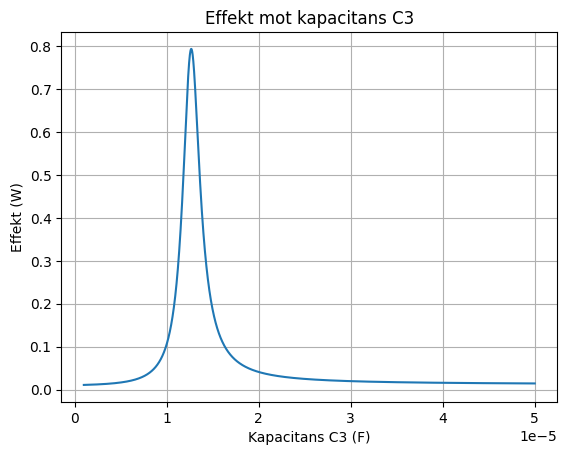

In [205]:
plt.plot(C3, P)
plt.xlabel("Kapacitans C3 (F)")
plt.ylabel("Effekt (W)")
plt.title("Effekt mot kapacitans C3")
plt.grid(True)
plt.show()